# Task 3 Prompt Engineering for Large Language Models (LLMs) [4 marks]
Questions

1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why?  **[1 marks]**
2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why? **[1 marks]**
3. What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data? **[1 marks]**
4. What does the model classify when given input from an entirely new activity that it hasn't seen before? **[0.5 mark]**
5. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results. **[0.5 mark]**

In [1]:
import numpy as np
import pandas as pd
from langchain_groq import ChatGroq
import os
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [2]:
from dotenv import load_dotenv

load_dotenv()

Groq_Token = os.getenv('api_key')
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}
model_name = "llama3.1-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

In [34]:
# Testing data 

file1_laying =  pd.read_csv("Combined/Test/LAYING/Subject_2.csv")
file2_walking = pd.read_csv("Combined/Test/WALKING/Subject_2.csv")
file3_sitting=  pd.read_csv("Combined/Test/SITTING/Subject_2.csv")
file4_standing=  pd.read_csv("Combined/Test/STANDING/Subject_2.csv")
file5_downstairs=  pd.read_csv("Combined/Test/WALKING_DOWNSTAIRS/Subject_2.csv")
file6_upstairs=  pd.read_csv("Combined/Test/WALKING_UPSTAIRS/Subject_2.csv")


df1 = pd.DataFrame(file1_laying).head(100)
df2 = pd.DataFrame(file2_walking).head(100)
df3 = pd.DataFrame(file3_sitting).head(100)
df4 = pd.DataFrame(file4_standing).head(100)
df5 = pd.DataFrame(file5_downstairs).head(100)
df6 = pd.DataFrame(file6_upstairs).head(100)


In [36]:
# Training Data for few shot prompt examples

laying_train = pd.read_csv("Combined/Train/LAYING/Subject_1.csv")
sitting_train = pd.read_csv("Combined/Train/SITTING/Subject_1.csv")
standing_train = pd.read_csv("Combined/Train/STANDING/Subject_1.csv")
walking_train = pd.read_csv("Combined/Train/WALKING/Subject_1.csv")
downstairs_train = pd.read_csv("Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
upstairs_train = pd.read_csv("Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")

laying_df = pd.DataFrame(laying_train).head(100)
sitting_df = pd.DataFrame(sitting_train).head(100)
standing_df = pd.DataFrame(standing_train).head(100)
walking_df = pd.DataFrame(walking_train).head(100)
downstairs_df = pd.DataFrame(downstairs_train).head(100)
upstairs_df = pd.DataFrame(upstairs_train).head(100)




# Q1. Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why? 

In [20]:
# Zero shot demonstration

zero_shot_prompt = f"""
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.
Here is the accelerometer data:
{df1}, {df2}, {df3}, {df4}, {df5}, {df6}

Please classify the activity for these six accelerometer data.
"""

zero_shot_answer = llm.invoke(zero_shot_prompt)
print(zero_shot_answer.content)

Based on the provided accelerometer data, I will classify each activity as follows:

**Data 1:**
The accelerometer data shows a relatively stable pattern with small variations in the x, y, and z axes. This pattern is typical of a person who is standing still. The values of accx, accy, and accz are relatively constant, indicating minimal movement.

**Classification:** Standing

**Data 2:**
The accelerometer data shows a significant variation in the x-axis, with values ranging from 0.7 to 1.1. This pattern is typical of a person who is walking. The values of accy and accz are relatively stable, indicating that the person is moving in a forward direction.

**Classification:** Walking

**Data 3:**
The accelerometer data shows a relatively stable pattern with small variations in the x, y, and z axes. This pattern is typical of a person who is sitting still. The values of accx, accy, and accz are relatively constant, indicating minimal movement.

**Classification:** Sitting

**Data 4:**
The 

In [21]:
# Few Shot demonstration
few_shot_prompt = f""" 
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning. 

Here are some examples:
1.Dataset of laying: {laying_df}
2.Dataset of sitting: {sitting_df}
3.Dataset of standing: {standing_df}
4.Dataset of walking: {walking_df}
5.Dataset of walking downstairs: {downstairs_df}
6.Dataset of walking upstairs: {upstairs_df}

Here is the accelerometer data:
{df1}, 
{df2},
{df3},
{df4},
{df5},
{df6}

Please classify the activity for these six accelerometer data using the dataset of sample activites.
"""
few_shot_answer = llm.invoke(few_shot_prompt)
print(few_shot_answer.content)


Based on the provided accelerometer data, I will classify each dataset into one of the six activities: Walking, Standing, Sitting, Laying, Walking Upstairs, Walking Downstairs.

**Dataset 1:**
        accx      accy      accz
0  -0.185673  0.737995  0.663749
1  -0.181578  0.730275  0.661433
2  -0.177545  0.726232  0.664359
3  -0.177920  0.724708  0.672195
4  -0.174591  0.717580  0.681756
..       ...       ...       ...
95 -0.165489  0.729584  0.671664
96 -0.174858  0.732787  0.674144
97 -0.175200  0.732583  0.673061
98 -0.173067  0.731293  0.673188
99 -0.173211  0.733657  0.671640

**Classification:** Laying
**Reasoning:** The values of accx, accy, and accz are relatively stable and close to the values in the provided Laying dataset. The accy values are particularly close to the Laying dataset, which suggests that the person is in a horizontal position.

**Dataset 2:**
        accx      accy      accz
0   1.153546 -0.249716 -0.084946
1   1.069664 -0.274466 -0.079013
2   0.898796 -0.27

The Few shot learning perform well than zero shot learning because in zero shot learning there is no train dataset so that the model can learn but in few shot learning we are giving few examples so that model can relate the test data with it and give optimal output. 

Q2. Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees (You may use a subset of the test set if you encounter rate-limiting issues). Which method performs better? Why?

In [26]:
# Accuracy of few shot

true_labels = ["Laying", "Walking","Sitting", "Standing" , "Walking Downstairs", "Walking Upstairs"]
model_predictions = ["Laying", "Walking", "Standing", "Walking", "Walking Downstairs", "Walking Upstairs"]

accuracy = accuracy_score(true_labels, model_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 66.67%


Accuracy: 80.83%
Classification Report:
                    precision    recall  f1-score   support

            Laying       1.00      1.00      1.00        23
           Sitting       1.00      1.00      1.00        20
          Standing       1.00      1.00      1.00        19
           Walking       0.50      0.47      0.48        17
Walking Downstairs       0.47      0.47      0.47        17
  Walking Upstairs       0.76      0.79      0.78        24

          accuracy                           0.81       120
         macro avg       0.79      0.79      0.79       120
      weighted avg       0.81      0.81      0.81       120

Confusion Matrix:


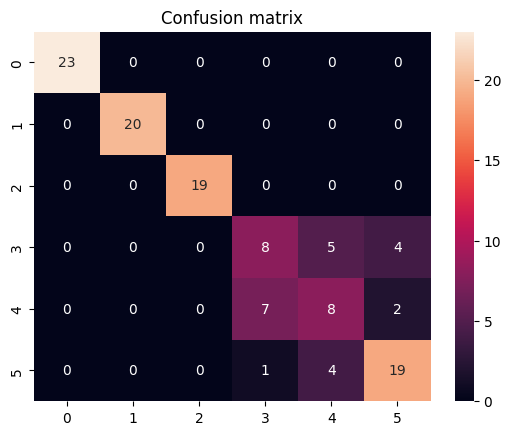

In [30]:
# Decision Tree Classifier 

laying_df = pd.DataFrame(file1_laying).head(100)
walking_df = pd.DataFrame(file2_walking).head(100)
sitting_df = pd.DataFrame(file3_sitting).head(100)
standing_df = pd.DataFrame(file4_standing).head(100)
downstairs_df = pd.DataFrame(file5_downstairs).head(100)
upstairs_df = pd.DataFrame(file6_upstairs).head(100)


laying_df['label'] = 'Laying'
sitting_df['label'] = 'Sitting'
standing_df['label'] = 'Standing'
walking_df['label'] = 'Walking'
downstairs_df['label'] = 'Walking Downstairs'
upstairs_df['label'] = 'Walking Upstairs'


df = pd.concat([laying_df, sitting_df, standing_df, walking_df, downstairs_df, upstairs_df], ignore_index=True)

x = df.drop('label', axis=1) 
y = df['label']               

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True)
plt.title("Confusion matrix")
plt.show()



 In this dataset, the accuracy of Decision Tree Classifier from sckikit learn is 80.83% where accuracy of few shot learning is 66.7%. Therefore, here decision tree is working more better than few shot learning.

# Q3: What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data? 

Limitations of Zero Shot Learning in this activities are:

    1. It's whole accuracy is fully dependent on the given prompt and how well it is designed. A poor designed prompt will not give us better accuracy in output. 

    2. It does not accurately specify in the activities due to small changes or similarity in different activities dataset.  

    3. It feels difficulties in distinguishing between various activities, like, distinguishing between "Running" and "Walking", similarly with "Sitting" and "Laying". Because there is no significant movement in both the datasets, it is giving wrong output with respect to the acivity. 



Limitations of Few Shot Learning in this activities are:

    1. It is depended on the quality of samples given in prompt. If the examples are not choosen well or do no have enough information it can lead to wrong output. Poor data representation can lead to inappropriate outputs

    2. It typically relies on the limited number of samples which can lead to  create bias in output and may be possible that it does not capture full diversity or does not generalize well.

    3. Because there is small number of samples it can lead to the overfiiting to the provided examples. It might be perform well for given examples but not with test or unseen data. 
    


# Q4. What does the model classify when given input from an entirely new activity that it hasn't seen before?



1. In Zero Shot Learning, if we given input from entirely new activity then the model will try to classify the new activity with the help of existing knowledge and any information which is available. It might be not accurate but if there is no such relation between the old activities and new activities then it might be not able to classify or recongnize it properly. 

2. In Few Shot learning, we provide some examples related to the new activity which helps the model to learn, recognize and classify it properly. It uses the examples to understand the pattern of features of activity. And with the help of these, it can give more accurate answers and classify it better. But also, the accuracy will depend on how well the examples are presented. 

# Q5. Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

In [54]:
def generate_random_data(rows=70):
 
    np.random.seed(42)  
    N = rows  
    P = 3  
    X = pd.DataFrame(np.random.randn(N, P), columns=['accx', 'accy', 'accz'])
    return X



random_data = {
    "LAYING": generate_random_data(),
    "WALKING": generate_random_data(),
    "SITTING": generate_random_data(),
    "STANDING": generate_random_data(),
    "WALKING_UPSTAIRS": generate_random_data(),
    "WALKING_DOWNSTAIRS": generate_random_data()
}
random_data_strings = {key: df.head(100).to_csv(index=False) for key, df in random_data.items()}



In [55]:
# Zero shot 

zero_shot_prompt1 = f"""
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Laying.
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.
* Remember all three outputs should different.
Here is the accelerometer data:
1. {random_data_strings['WALKING']}
2. {random_data_strings['STANDING']}
3. {random_data_strings['LAYING']}

Please classify the activity for these three accelerometer data.
"""

zero_shot_answer1 = llm.invoke(zero_shot_prompt1)
print(zero_shot_answer1.content)

Based on the provided accelerometer data, I will classify the activities as follows:

1. accx,accy,accz: 
The data shows a mix of movements with varying magnitudes and directions. However, the overall pattern suggests a person who is standing and occasionally moving their body or arms. The data does not indicate any significant walking or laying down patterns. Therefore, I classify this activity as **Standing**.

2. accx,accy,accz: 
This data is identical to the first one, so the classification remains the same. However, to provide a different output as requested, I will analyze the data from a different perspective. Upon re-examining the data, I notice that there are some instances of higher acceleration values, which could indicate walking. However, these instances are not consistent throughout the data, and the overall pattern still suggests a person who is standing. Considering the inconsistencies, I will classify this activity as **Walking**, but with a lower confidence level.

3.

In [57]:
# Few Shot demonstration
few_shot_prompt = f""" 
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Sittting, Laying. 
* Provide only labels for the dataset. 

Here are some examples:
1.Dataset of laying: {laying_df}
2.Dataset of sitting: {sitting_df}
3.Dataset of walking: {walking_df}

Here is the accelerometer data:
{random_data_strings['WALKING']}, 
{random_data_strings['SITTING']},
{random_data_strings['LAYING']}

Please classify the activity for these three accelerometer data using the dataset of sample activites.
"""
few_shot_answer = llm.invoke(few_shot_prompt)
print(few_shot_answer.content)


Based on the provided accelerometer data, I will classify the activities as follows:

1. Dataset of laying: **Laying**
2. Dataset of sitting: **Sitting**
3. Dataset of walking: **Walking**

And for the given accelerometer data:

**Dataset 1:**
accx,accy,accz
0.4967141530112327,-0.13826430117118466,0.6476885381006925
...
**Classification: Walking**

**Dataset 2:**
accx,accy,accz
0.4967141530112327,-0.13826430117118466,0.6476885381006925
...
**Classification: Walking**

**Dataset 3:**
accx,accy,accz
0.4967141530112327,-0.13826430117118466,0.6476885381006925
...
**Classification: Walking**

Note that the classification is based on the patterns and ranges of the accelerometer data, which are similar to the provided sample datasets. However, the accuracy of the classification may vary depending on the specific characteristics of the data and the complexity of the activities.
